# Введение в искусственные нейронные сети
# Урок 2. Основы обучения нейронных сетей

## Содержание методического пособия:


<ol>
    <li>Основы обучения нейронных сетей</li>
    <li>Инициализация весов. Функции активации</li>
    <li>Обратное распространение ошибки и градиентный спуск</li>
    <li>Пример построения двухслойной нейронной сети на numpy</li> 
</ol>

In [7]:
## Общие сведения о том, как происходит обучение нейронных сетей

Давайте возьмем какую-нибудь типичную задачу для нейросети и попробуем разобрать как она могла бы ее решить. В качества примера задачи можем взять типичный пример — определить на фотографии находиться кот или собака. 

Сначала давайте подумаем как это данная задача решалась бы без нейронной сети. Вспомним, что фотография это набор пикселей. Пиксели в компьютере репрезентуются матрицей чисел. Если бы все коты были синего цвета, а собаки красного мы могли бы просто детектировать числа ответственные за данные цвета в изображении и на основании этого делать выводы о том кот или собака расположены на фотографии. В действительности как мы понимаем это не так. У кота очень много отличительных черт, как и у собаки. Перечисление этих уникальных свойств займет долгое время. Но стоит учесть вот какое обстоятельство - усики и лапки и шерстка есть у многих животных. И скорее всего все, что нам остается делать, это описывать размеры этих усиков, лапок и т. д. Изучать их угла наклона и т. д. Попытки делать это вручную были, как раз до эпохи нейронных сетей. Но результаты распознавания были не высоки. Как вы понимаете объем признаков слишком большой. 

Таким образом, задача нейронной сети содержать в себе необходимый набор признаков которые позволяет ей отличить один объект от друго. В данном уроке будет разобран пример разработки нейронной сети которая будет обучаться различать разновидности цветка ириса. Данные виды похожи они состоят из одинаковых элементов, но эти элементы имеют разные размеры в случаи каждого отдельного вида. На этом простом примере мы сможем понять как работают более сложные нейронные сети.
Но встает вопрос как поместить в нейронную сеть необходимый набор признаков? Ответ на этот вопрос будет даваться в течении всего данного курса и все равно не будет исчерпывающим. Поскольку для это придется обучать нейронную сеть, а ее обучение порой приобретает характер искусства, нежели набор предписаний.
Тем не менее, в процессе обучения всегда нужно пройти ряд этапов, которые будут общими для любого процесса обучения.

Нам необходимо определиться с архитектурой нейронной сети. От удачно выбранной архитектуры будет зависеть, насколько быстро мы сможем обучить нейронную сеть, насколько точной она будет, а также сможем ли мы ее обучить в принципе. 
Архитектура нейронной сети как вы догадываетесь зависит от задачи. В зависимости от задачи нам нужно будет выбрать:

- Количество слоев из которых будет состоять нейронная сеть
- Сколько будет нейронов в этих слоях

Кроме этого нам нужно будет подобрать верным образом компоненты, за счет которых будет обучаться нейронная сеть (подробнее о них можно будет узнать в следующих разделах данного мет. пособия)

- Систему инициализации весов нейронов 
- Функцию активации весов нейронов
- Алгоритм корректировки весов нейронов

Это, безусловно, список самых общих компонентов с которыми нам нужно будет определиться, но на данной стадии обучения надо полагать нам их будет достаточно. 
Архитектуры нейронных сетей мы будем изучать на отдельных уроках этого курса. В этом же уроке мы разберем следующие неотъемлемые компоненты обучения нейронной сети любой архитектуры — инициализация весов, их корректировка, рассмотрим виды функций активации весов нейронной сети, разберем, что такое градиентный спуск и метод обратного распространения ошибки.

## Инициализация весов. Функции активации

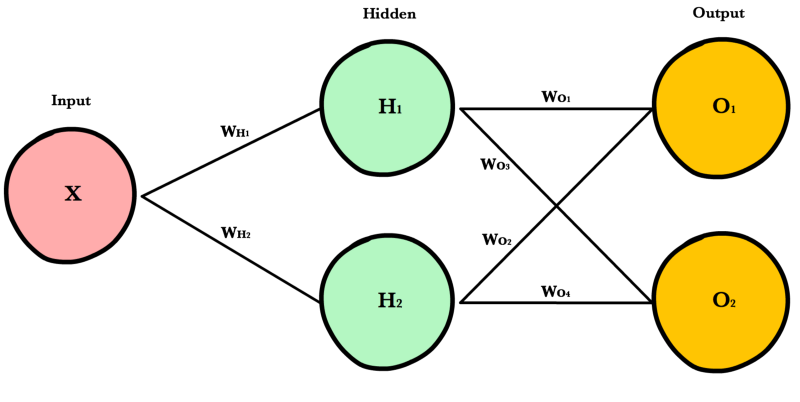

Мы с вами выяснили, что в процессе обучения нейронной сети в ней должны вырабатываться признаки, по которым она сможет определять, что на фотографии. Но как эти признаки будут репрезентованы в нейронной сети? Все эти признаки будут составлять определенную сложную матрицу чисел. Настолько сложную, что человеку не под силу ее проанализировать. Какие это будут признаки? Это тоже неизвестно. Их может быть так много и они могут быть такими специфическими, что и описать их будет трудно. Для этого и нужны нейросети, они берут на себя содержание и описание в себе этих признаков.

Однако все эти признаки записываются через систему весов нейронов. Веса нейрона отражают толщину связи этого нейрона с др. нейроном. Из совокупности  этих связей и состоят признаки. Т.е. другими словами обучить нейронную сеть значит найти нужные веса для ее нейронов. 

Первоначально веса можно задать случайными числами. И в процессе обучения они будут все больше и больше подходить под решения задачи. Программно это можно показать на примере фрагмента кода из прошлого урока.

In [8]:
import numpy as np
import random

# генерации случайных чисел для инициализации весов
np.random.seed(1)
synaptic_weights = 2 * np.random.random((3, 1)) - 1

# можем дополнительно посмотреть процесс формирования весов
step1 = np.random.random((3,1))
print(step1, end='\n\n')
step2 = step1 - 1 
print(step2, end='\n\n')
step3 = 2 * step2
print(step3)

[[0.30233257]
 [0.14675589]
 [0.09233859]]

[[-0.69766743]
 [-0.85324411]
 [-0.90766141]]

[[-1.39533485]
 [-1.70648822]
 [-1.81532281]]


Но мало просто присвоить определенные веса нейронам. Необходимо также определить функцию, по которой будет активироваться нейроны. Выбранная функция активация будет одинаковой для всех нейронов. С ее помощью можно определять, с какой силой нужно подействовать на нейрон, чтобы он  активировался и передал сигнал дальше.

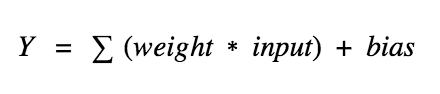

На картинке выше показан нейрон в виде формулы. Активация его, как говорилась, зависит от входных данных, его весов и некоего порогового значения.

Функций таких существует очень много - сигмоида, линейная, ступенчатая, ReLu, tahn и т. д. Нам скорее сейчас нужно понять их суть изложенную выше нежели чем научиться их выбирать. Отметим лишь следующее. Для учебных целей часто можно встретить сигмоиду. Для реальных задач — ReLu.

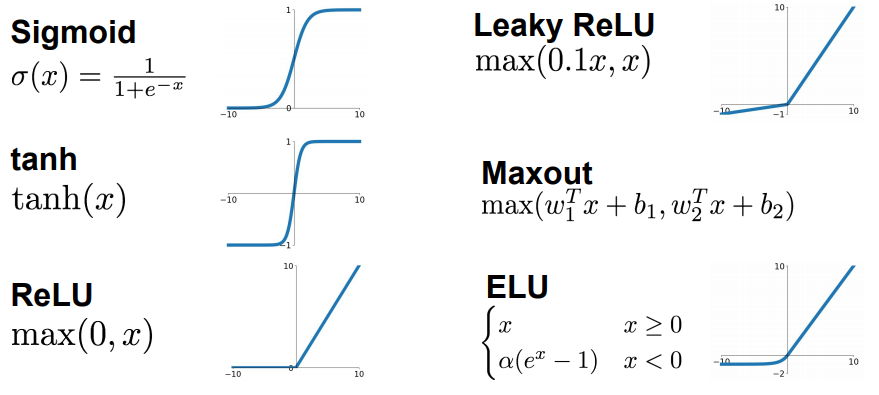

В примере из прошлого урока мы можем посмотреть как программно реализовать функцию сигмоид -

In [9]:
# вычисление сигмоид функции

def sigmoid(x):
     return 1 / (1 + np.exp(-x))

А вот как например на Python можно реализовать упомянутую выше функцию активации Relu - 

In [10]:
# вычисление Relu функции

def ReLU(x):
         return x  *  (x  >  0)

In [11]:
## Обратное распространение ошибки и градиентный спуск

Давайте прежде чем начнем разбирать обратное распространение и градиентный спуск, скажем несколько слов о тех типах архитектур нейронной сети, которая использовалась в первом уроке и которая будет в данном уроке. Это простые нейронные сети. С точки зрения архитектуры их можно отнести к полносвязным нейронным сетям так как все нейроны связаны между собой. С другой стороны их можно отнести к нейронным сетям прямого распространения(feed forward). Сети прямого распространения подразумевает распространения сигналы от вход к выходу, в отличии от рекуррентных нейронных сетей где во внутренних слоях сигналы могут ходить по циклу. О плюсах и минусах сетей полносвязных мы поговорим в уроке посвященном Сверточным нейронным сетям, поскольку данные нейронные сети отошли от этого подхода и нам нужно будет выяснить почему.

После того как на выходе нейронной сети мы получили определенное цифровое значение нам нужно сравнить его с искомым. Мы можем посчитать насколько в количественном выражение ошиблась нейросеть. Задача обратного распространения ошибки пройтись от выхода ко входу и скорректировать веса нейронов. Это процесс происходит множество раз в процесс обучения.

Можно сказать, что процесс обучения нейронной сети это попытка оптимизировать веса 
нейронной сети до тех пор пока не будет достигнута минимальная степень ошибки. Для этого хорошо подходит такой алгоритм как градиентный спуск. Суть данного метода заключается в том, чтобы искать такие числовые параметры при которых значение ошибки достигнет нуля. Градиентным он называется потому что это процесс пошаговый, требующий одно вычисление за другим. Спуском он называется потому что значение ошибки должно быть как можно меньше.

Обратите внимание на следующий график из него видно, что есть определенное число по шкале весов которому соотсветствует минимальное значение по шкале Error. Это число и нужно находить в процессе обучения нейронных сетей.

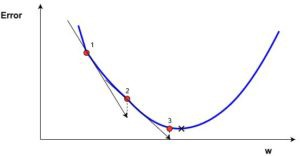

Давайте попробуем реализовать программно градиентный спуск, чтобы лучше понять как он работает.

In [12]:
''' 
Исходный код к уроку 2.
Демонстрация работы градиентного спуска 
'''

# первоначальное точка
start_point = 5

# размер шага(learning rate)
learn_r = 0.001

# установка первоначальной точности
precision = 0.000001

# функция градиента 
gr_func = lambda x: 4 * x**3 - 9 * x**2

# количество итерация 
n = 1000000
next_point = start_point

iter = 0 
for i in range(n):   
  current_point = next_point

  # движение в негативную сторону вычисляемого градиента
  next_point = current_point - learn_r*gr_func(current_point)
  # print(next_point)                                     

  iter += 1

  # остановка когда достигнута необходимая степень точности
  print(f"Итерация: {iter}")
  print(f"Текущая точка {current_point}| След-я точка {next_point}")
  print(f"Дистан-я между текущей точк. и след. {abs(current_point - next_point)}")
  print("--------------------------------------------------------")

  if(abs(current_point - next_point) <= precision): 
      break

print(f"минимум {next_point}, количество затраченных итераций: {iter}") 

Итерация: 1
Текущая точка 5| След-я точка 4.725
Дистан-я между текущей точк. и след. 0.27500000000000036
--------------------------------------------------------
Итерация: 2
Текущая точка 4.725| След-я точка 4.5039763125
Дистан-я между текущей точк. и след. 0.2210236874999998
--------------------------------------------------------
Итерация: 3
Текущая точка 4.5039763125| След-я точка 4.321081438125772
Дистан-я между текущей точк. и след. 0.18289487437422824
--------------------------------------------------------
Итерация: 4
Текущая точка 4.321081438125772| След-я точка 4.166398621877091
Дистан-я между текущей точк. и след. 0.1546828162486804
--------------------------------------------------------
Итерация: 5
Текущая точка 4.166398621877091| След-я точка 4.033332506384824
Дистан-я между текущей точк. и след. 0.13306611549226677
--------------------------------------------------------
Итерация: 6
Текущая точка 4.033332506384824| След-я точка 3.917289126298229
Дистан-я между текущей точ

Итерация: 395
Текущая точка 2.250218623340028| След-я точка 2.2502141953570196
Дистан-я между текущей точк. и след. 4.427983008259417e-06
--------------------------------------------------------
Итерация: 396
Текущая точка 2.2502141953570196| След-я точка 2.2502098570751667
Дистан-я между текущей точк. и след. 4.338281852866999e-06
--------------------------------------------------------
Итерация: 397
Текущая точка 2.2502098570751667| След-я точка 2.2502056066766376
Дистан-я между текущей точк. и след. 4.250398529137556e-06
--------------------------------------------------------
Итерация: 398
Текущая точка 2.2502056066766376| След-я точка 2.250201442380467
Дистан-я между текущей точк. и след. 4.1642961705612436e-06
--------------------------------------------------------
Итерация: 399
Текущая точка 2.250201442380467| След-я точка 2.2501973624418072
Дистан-я между текущей точк. и след. 4.0799386598067144e-06
--------------------------------------------------------
Итерация: 400
Текущая

Метод обратного распространения(backpropogation) самый популярный способ обучения нейронных сетей, однако у него есть несколько альтернатив - Метод упругого распространения(Resilient propagation или Rprop)  и генетический алгоритм(Genetic Algorithm). Rprop для корректировки весов и смещений использует знак градиента, а не его значение, а генетический алгоритм для задач оптимизации и моделирования использует случайный подбор.


## Пример построения  двухслойной нейронной сети на numpy

Мы разобрались с основами обучения нейронных сетей и получили некоторое представление об архитектурах простых нейронных сетей. Давайте попробуем закрепить эти знания на практике. Кроме того на примере который будет изложен ниже возможно проясняться какие-либо оставшиеся вопросы.

В данном примере мы сделаем нейронную сеть, которая будет отличать различные виды ириса друг от друга. Надо полагать, данный датасет вам уже знаком. Логика работы этого кода будет такой же как и в примере на первом уроке, но только все компоненты этого кода будут несколько усложнены.

Точность нейронной сети 96.11%


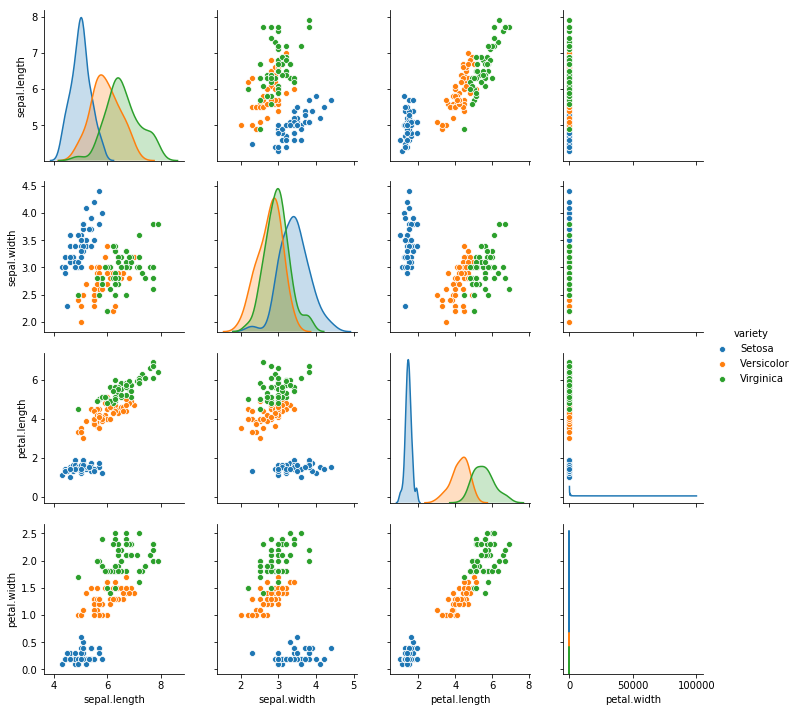

In [18]:
'''
Исходный код к уроку 2.
Построение 2 слойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split


### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)


### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
#g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
g = sns.pairplot(iris_data, hue="variety")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['variety'].replace(['Setosa', 'Virginica', 'Versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ["sepal.length","sepal.width","petal.length","petal.width"]
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.as_matrix())

# формирование выходных данных(результатов)
columns = ['variety']
y = pd.DataFrame(iris_data, columns=columns)
y = y.as_matrix()
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
   
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(100000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
# plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

В первых двух уроках мы с вами рассматривали, как сделать простые нейронные сети без использования специальных фреймворков и библиотек для этого. В следующих уроках мы с вами познакомимся как делать нейронные сети с помощью Keras и TensorFlow.

## Практическое задание

<ol>
    <li>Попробуйте видоизменить параметры разобранной на уроке нейронной сети таким образом, чтобы улучшить ее точность. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?</li>
</ol>

## Дополнительные материалы

<ol>
    <li>https://medium.com/topic/machine-learning</li>
</ol>

## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>Глубокое обучение — Николенко С. И., Кадурин 2018</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>A direct adaptive method for faster backpropagation learning: the RPROP algorithm - Neural Networks, 1993</li>
    <li>Википедия</li>
    
</ol>